In [1]:
import pandas as pd

# Charger les datasets
felids_train = pd.read_csv('felids_train.csv')
felids_validation = pd.read_csv('felids_validation.csv')
proboscidia_train = pd.read_csv('proboscidia_train.csv')
proboscidia_validation = pd.read_csv('proboscidia_validation.csv')

# Afficher les 5 premières lignes de chaque dataset
print("\nFelids Train Dataset (5 premières lignes):")
print(felids_train.head())

print("\nFelids Validation Dataset (5 premières lignes):")
print(felids_validation.head())

print("\nProboscidia Train Dataset (5 premières lignes):")
print(proboscidia_train.head())

print("\nProboscidia Validation Dataset (5 premières lignes):")
print(proboscidia_validation.head())


Felids Train Dataset (5 premières lignes):
     id observed_on     local_time_observed_at   latitude   longitude  \
0  3192  2009-08-16  2009-08-16 18:45:00-07:00  38.041290 -122.791489   
1  3424  2009-10-31  2009-10-31 17:24:00-07:00  37.856739 -121.767799   
2  3865  2009-12-06  2009-12-06 11:41:00-08:00  38.045437 -122.867188   
3  4125  2009-07-25  2009-07-26 07:27:00+02:00 -19.285032   23.535144   
4  5604  2010-02-18  2010-02-18 10:38:00-08:00  37.092007 -121.429604   

   positional_accuracy  public_positional_accuracy  \
0                  NaN                         NaN   
1                  NaN                         NaN   
2                  NaN                         NaN   
3                  NaN                     30580.0   
4                  NaN                         NaN   

                                           image_url      license geoprivacy  \
0  https://inaturalist-open-data.s3.amazonaws.com...          CC0        NaN   
1  https://inaturalist-open-data

In [2]:
print(felids_train.columns.tolist())
print("\n")
print(proboscidia_train.columns.tolist())
print("\n")
print(proboscidia_validation.columns.tolist())
print("\n")
print(proboscidia_validation.columns.tolist())

['id', 'observed_on', 'local_time_observed_at', 'latitude', 'longitude', 'positional_accuracy', 'public_positional_accuracy', 'image_url', 'license', 'geoprivacy', 'taxon_geoprivacy', 'scientific_name', 'common_name', 'taxon_id', 'taxon_kingdom_name', 'taxon_phylum_name', 'taxon_class_name', 'taxon_order_name', 'taxon_family_name', 'taxon_genus_name', 'taxon_species_name']


['id', 'observed_on', 'local_time_observed_at', 'latitude', 'longitude', 'positional_accuracy', 'public_positional_accuracy', 'image_url', 'license', 'geoprivacy', 'taxon_geoprivacy', 'scientific_name', 'common_name', 'taxon_id', 'taxon_kingdom_name', 'taxon_phylum_name', 'taxon_class_name', 'taxon_order_name', 'taxon_family_name', 'taxon_genus_name', 'taxon_species_name']


['Unnamed: 0', 'id', 'observed_on', 'local_time_observed_at', 'latitude', 'longitude', 'positional_accuracy', 'public_positional_accuracy', 'image_url', 'license', 'geoprivacy', 'taxon_geoprivacy', 'scientific_name', 'common_name', 'taxon_id', 

In [3]:
# Colonnes sélectionnées pour un modèle machine learning simple et avancé
selected_columns = [
    'id', 'observed_on', 'local_time_observed_at', 'latitude', 'longitude', 'positional_accuracy', 
    'public_positional_accuracy', 'image_url', 'license', 'geoprivacy', 'taxon_geoprivacy', 
    'scientific_name', 'common_name', 'taxon_id', 'taxon_kingdom_name', 'taxon_phylum_name', 'taxon_class_name', 
    'taxon_order_name', 'taxon_family_name', 'taxon_genus_name', 'taxon_species_name'
]

# Filtrer les colonnes dans les datasets felids

felids_validation = felids_validation[selected_columns]

proboscidia_validation = proboscidia_validation[selected_columns]


In [4]:
print(len(proboscidia_train.index))
print(len(proboscidia_validation.index))
print(len(felids_train.index))
print(len(felids_validation.index))

9891
1398
64536
3879



Felids Model Performance:
Mean Squared Error: 30178630217.72207
R2 Score: 0.4893351554674652


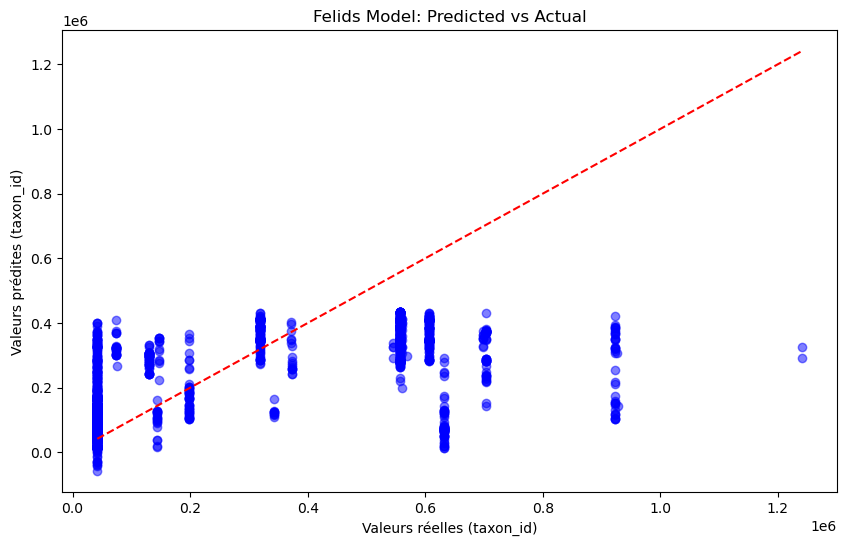

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Préparer les datasets pour la régression linéaire
features = ['latitude', 'longitude', 'positional_accuracy', 'public_positional_accuracy']
target = 'taxon_id'

# Filtrer et préparer les données pour felids
felids_train_filtered = felids_train[features + [target]].dropna()
felids_validation_filtered = felids_validation[features + [target]].dropna()

# Modèle de régression linéaire pour felids
felids_model = LinearRegression()
felids_model.fit(felids_train_filtered[features], felids_train_filtered[target])
felids_predictions = felids_model.predict(felids_validation_filtered[features])
felids_mse = mean_squared_error(felids_validation_filtered[target], felids_predictions)
felids_r2 = r2_score(felids_validation_filtered[target], felids_predictions)

print("\nFelids Model Performance:")
print(f"Mean Squared Error: {felids_mse}")
print(f"R2 Score: {felids_r2}")

# Graphique de dispersion pour les Felids
plt.figure(figsize=(10, 6))
plt.scatter(felids_validation_filtered[target], felids_predictions, color='blue', alpha=0.5)
plt.plot([felids_validation_filtered[target].min(), felids_validation_filtered[target].max()],
         [felids_validation_filtered[target].min(), felids_validation_filtered[target].max()],
         color='red', linestyle='--')  # ligne de régression (ligne idéale)
plt.title('Felids Model: Predicted vs Actual')
plt.xlabel('Valeurs réelles (taxon_id)')
plt.ylabel('Valeurs prédites (taxon_id)')
plt.show()


Proboscidia Model Performance:
Mean Squared Error: 9379647211.632536
R2 Score: 0.6274022787653288


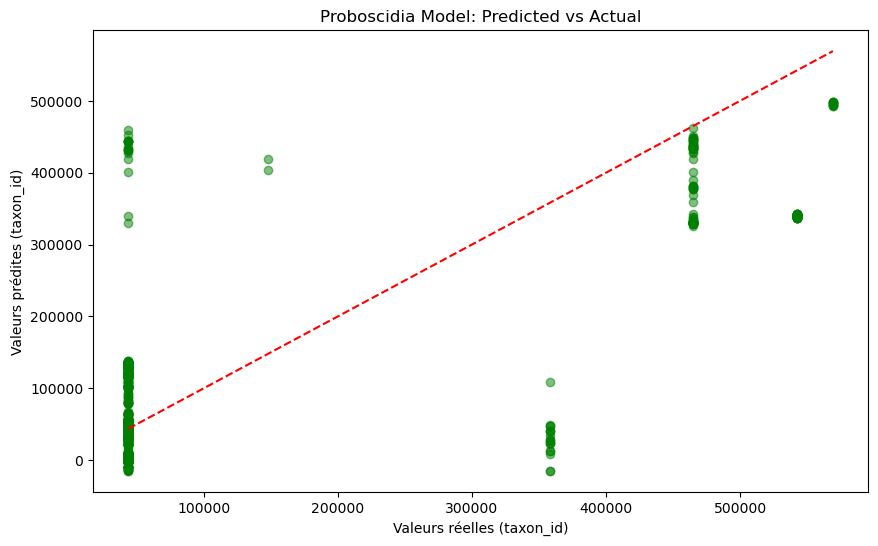

In [6]:
# Filtrer et préparer les données pour proboscidia
proboscidia_train_filtered = proboscidia_train[features + [target]].dropna()
proboscidia_validation_filtered = proboscidia_validation[features + [target]].dropna()

# Modèle de régression linéaire pour proboscidia
proboscidia_model = LinearRegression()
proboscidia_model.fit(proboscidia_train_filtered[features], proboscidia_train_filtered[target])
proboscidia_predictions = proboscidia_model.predict(proboscidia_validation_filtered[features])
proboscidia_mse = mean_squared_error(proboscidia_validation_filtered[target], proboscidia_predictions)
proboscidia_r2 = r2_score(proboscidia_validation_filtered[target], proboscidia_predictions)

print("\nProboscidia Model Performance:")
print(f"Mean Squared Error: {proboscidia_mse}")
print(f"R2 Score: {proboscidia_r2}")


plt.figure(figsize=(10, 6))
plt.scatter(proboscidia_validation_filtered[target], proboscidia_predictions, color='green', alpha=0.5)
plt.plot([proboscidia_validation_filtered[target].min(), proboscidia_validation_filtered[target].max()],
         [proboscidia_validation_filtered[target].min(), proboscidia_validation_filtered[target].max()],
         color='red', linestyle='--')  # ligne de régression (ligne idéale)
plt.title('Proboscidia Model: Predicted vs Actual')
plt.xlabel('Valeurs réelles (taxon_id)')
plt.ylabel('Valeurs prédites (taxon_id)')
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Convertir la colonne 'observed_on' en type datetime pour extraire des informations temporelles
for dataset in [felids_train, felids_validation, proboscidia_train, proboscidia_validation]:
    dataset['observed_on'] = pd.to_datetime(dataset['observed_on'])
    dataset['year'] = dataset['observed_on'].dt.year
    dataset['month'] = dataset['observed_on'].dt.month
    dataset['day'] = dataset['observed_on'].dt.day

# Préparer les données de felids
features = ['latitude', 'longitude', 'year', 'month', 'day']
target = 'geoprivacy'

# Encode the target labels
label_encoder = LabelEncoder()
felids_train[target] = label_encoder.fit_transform(felids_train[target])
felids_validation[target] = label_encoder.transform(felids_validation[target])

# Diviser en ensembles d'entraînement et de test
X_train = felids_train[features]
y_train = felids_train[target]
X_test = felids_validation[features]
y_test = felids_validation[target]

# Modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)

TypeError: object of type 'float' has no len()